# Supervised Machine Learning of Photometric Redshift

# Training Dataset
- Import data
- Treat data
- Plot histograms
- Overlay for visual representation

In [1]:
# Imports and initialization of main files
import matplotlib.pyplot as plt
import csv, pandas as pd

train_data = pd.read_csv('galaxy_redshift_sims_train.csv', sep=',')
test_data = pd.read_csv('galaxy_redshift_sims_valid.csv', sep=',')

In [2]:
# Data treatment, remove values too large for each photometric band

max_g = max(test_data['g_true'])
max_r = max(test_data['r_true'])
max_i = max(test_data['i_true'])
max_z = max(test_data['z_true'])
max_y = max(test_data['y_true'])

train_data = train_data[train_data.g <= max_g]
train_data = train_data[train_data.r <= max_r]
train_data = train_data[train_data.i <= max_i]
train_data = train_data[train_data.z <= max_z]
train_data = train_data[train_data.y <= max_y]

250000
229903


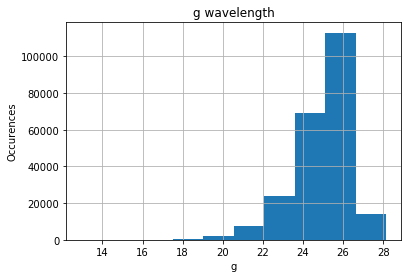

In [3]:
train_data.hist(column='g')
plt.ylabel('Occurences')
plt.xlabel('g')
plt.title('g wavelength')

plt.show()

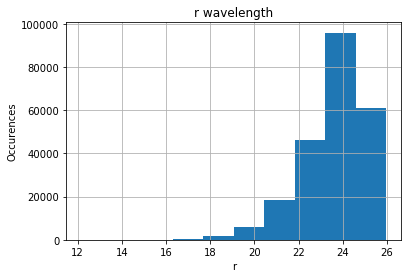

In [4]:
train_data.hist(column='r')
plt.ylabel('Occurences')
plt.xlabel('r')
plt.title('r wavelength')

plt.show()

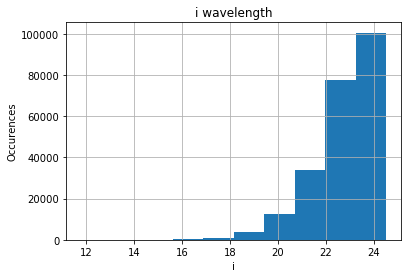

In [5]:
train_data.hist(column='i')
plt.ylabel('Occurences')
plt.xlabel('i')
plt.title('i wavelength')

plt.show()

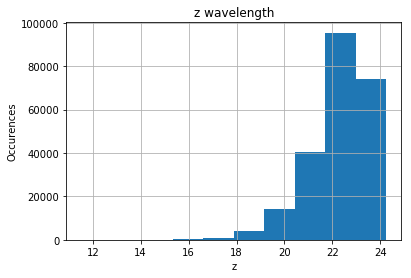

In [6]:
train_data.hist(column='z')
plt.ylabel('Occurences')
plt.xlabel('z')
plt.title('z wavelength')

plt.show()

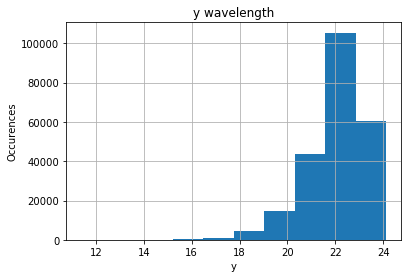

In [7]:
train_data.hist(column='y')
plt.ylabel('Occurences')
plt.xlabel('y')
plt.title('y wavelength')

plt.show()

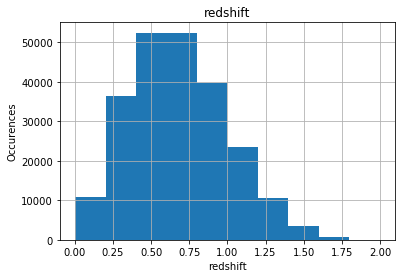

In [8]:
train_data.hist(column='redshift')
plt.ylabel('Occurences')
plt.xlabel('redshift')
plt.title('redshift')

plt.show()

# Now for Test Dataset

- Same as above, just the test set

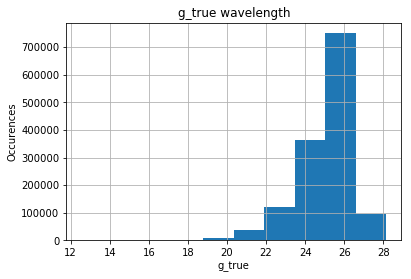

In [9]:
test_data.hist(column='g_true')
plt.ylabel('Occurences')
plt.xlabel('g_true')
plt.title('g_true wavelength')

plt.show()

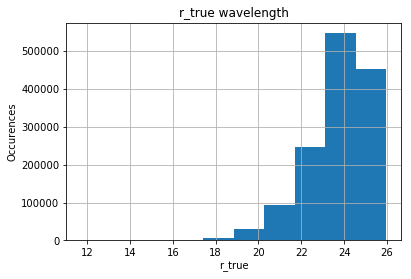

In [10]:
test_data.hist(column='r_true')
plt.ylabel('Occurences')
plt.xlabel('r_true')
plt.title('r_true wavelength')

plt.show()

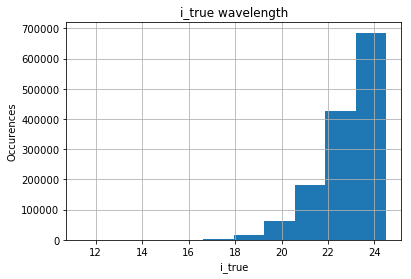

In [11]:
test_data.hist(column='i_true')
plt.ylabel('Occurences')
plt.xlabel('i_true')
plt.title('i_true wavelength')

plt.show()

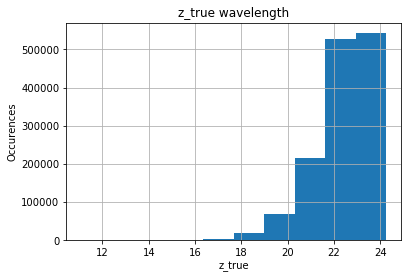

In [12]:
test_data.hist(column='z_true')
plt.ylabel('Occurences')
plt.xlabel('z_true')
plt.title('z_true wavelength')

plt.show()

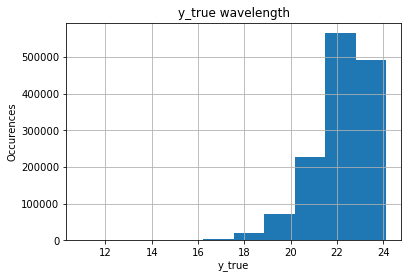

In [13]:
test_data.hist(column='y_true')
plt.ylabel('Occurences')
plt.xlabel('y_true')
plt.title('y_true wavelength')

plt.show()

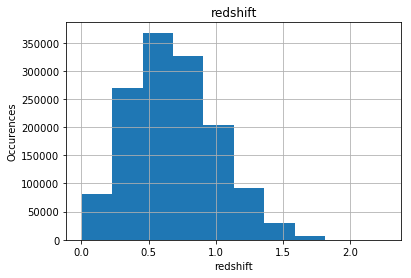

In [14]:
test_data.hist(column='redshift')
plt.ylabel('Occurences')
plt.xlabel('redshift')
plt.title('redshift')

plt.show()

# Comparison of Datasets

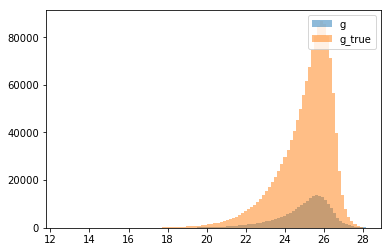

In [15]:
g = train_data['g']
g_true = test_data['g_true']

plt.hist(g, alpha=0.5, label='g', bins=100)
plt.hist(g_true, alpha=0.5, label='g_true', bins=100)
plt.legend(loc='upper right')
plt.show()


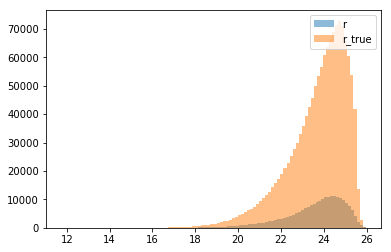

In [16]:
r = train_data['r']
r_true = test_data['r_true']

plt.hist(r, alpha=0.5, label='r', bins=100)
plt.hist(r_true, alpha=0.5, label='r_true', bins=100)
plt.legend(loc='upper right')
plt.show()

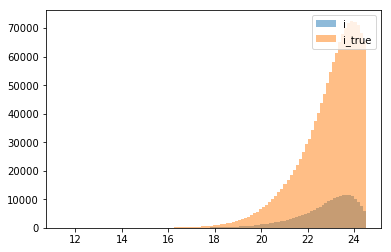

In [17]:
i = train_data['i']
i_true = test_data['i_true']

plt.hist(i, alpha=0.5, label='i', bins=100)
plt.hist(i_true, alpha=0.5, label='i_true', bins=100)
plt.legend(loc='upper right')
plt.show()

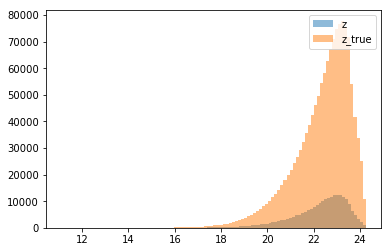

In [18]:
z = train_data['z']
z_true = test_data['z_true']

plt.hist(z, alpha=0.5, label='z', bins=100)
plt.hist(z_true, alpha=0.5, label='z_true', bins=100)
plt.legend(loc='upper right')
plt.show()

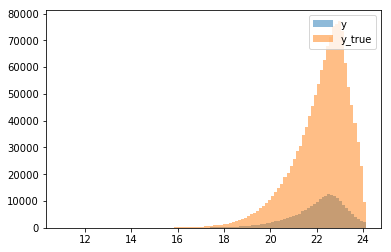

In [19]:
y = train_data['y']
y_true = test_data['y_true']

plt.hist(y, alpha=0.5, label='y', bins=100)
plt.hist(y_true, alpha=0.5, label='y_true', bins=100)
plt.legend(loc='upper right')
plt.show()

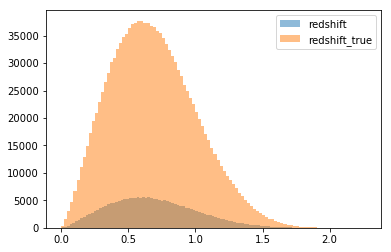

In [20]:
redshift = train_data['redshift']
redshift_true = test_data['redshift']

plt.hist(redshift, alpha=0.5, label='redshift', bins=100)
plt.hist(redshift_true, alpha=0.5, label='redshift_true', bins=100)
plt.legend(loc='upper right')
plt.show()

# Random Forest Algorithm
- Determine required depth and estimators
- Cross validation
- Fit and predict
- Redshift plot, slope is the 1:1 ratio, where the true redshift would be
- Limiting to 30,000 data points due to computational power
- Determine the Absolute Mean Error and the sigma_68 value, hoping for 0.05 maximum

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from numpy import sqrt

# Depth of 5 seems good. 3000 estimators is a decent number, further is very little improvement.
rf = RandomForestRegressor(max_depth=5, n_estimators = 30, random_state = 1, n_jobs=-1)
train_features = train_data[['y', 'g', 'r', 'i', 'z']]
train_target = train_data['redshift']

cross_validation = cross_val_score(rf, train_features, train_target, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation.mean()))

rf.fit(train_features, train_target)

0.157157392083


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [22]:
Features = ['y_true', 'g_true', 'r_true', 'i_true', 'z_true']
test_features = test_data[Features]
prediction = rf.predict(test_features)
print "List of predictions:", prediction, "\n"

List of predictions: [ 0.45906265  0.71468889  0.57245377 ...,  1.288991    0.72152058
  0.32630062] 



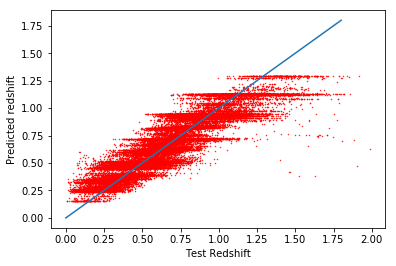

In [23]:
plt.scatter(test_data['redshift'].tolist()[:30000], prediction.tolist()[:30000], s=0.2, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.show()

In [24]:
import numpy as np

prediction_difference = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference.append(prediction[x] - test_data['redshift'][x])
    x += 1

sigma_68 = np.percentile(np.abs(prediction_difference), 68)
    
print(sigma_68)

0.131879076187


In [25]:
total = 0
for x in prediction_difference:
    total += np.abs(x)
    
mean = total/len(prediction_difference)
print(mean)

0.108931876539


# Adding 4 new features to Random Forest
- The values above not too great. A little larger than expected, and the graph seems all over.
- Attempt to redo using the color, the difference between the bands
- Add 4 new features; y-g, g-r, r-i, i-z
- all variables have _x appended for distinction

In [26]:
# creation of the new features from existing features (only a temporary data set)
train_data['y-g'] = train_data['y'] - train_data['g']
train_data['g-r'] = train_data['g'] - train_data['r']
train_data['r-i'] = train_data['r'] - train_data['i']
train_data['i-z'] = train_data['i'] - train_data['z']

test_data['y-g'] = test_data['y_true'] - test_data['g_true']
test_data['g-r'] = test_data['g_true'] - test_data['r_true']
test_data['r-i'] = test_data['r_true'] - test_data['i_true']
test_data['i-z'] = test_data['i_true'] - test_data['z_true']

In [27]:
rf_x = RandomForestRegressor(max_depth=9, n_estimators = 30, random_state = 1)


train_features_x = train_data[['y', 'g', 'r', 'i', 'z', 'y-g', 'g-r', 'r-i', 'i-z']]
train_target_x = train_data['redshift']

cross_validation_x = cross_val_score(rf_x, train_features_x, train_target_x, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation_x.mean()))

rf_x.fit(train_features_x, train_target_x)

# Improvement really small


0.102503813601


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [28]:
Features = ['y_true', 'g_true', 'r_true', 'i_true', 'z_true', 'y-g', 'g-r', 'r-i', 'i-z']
test_features_x = test_data[Features]
prediction_x = rf_x.predict(test_features_x)
print "List of predictions:", prediction_x, "\n"

List of predictions: [ 0.4564314   0.48251935  0.48872894 ...,  1.56350898  0.74109787
  0.35132677] 



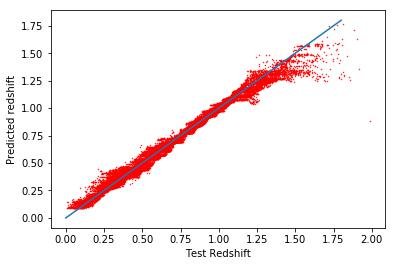

In [29]:
plt.scatter(test_data['redshift'].tolist()[:30000], prediction_x.tolist()[:30000], s=0.2, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.show()

# Much better!

In [30]:
import numpy as np

prediction_difference_x = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_x.append(prediction_x[x] - test_data['redshift'][x])
    x += 1

sigma_68_x = np.percentile(np.abs(prediction_difference_x), 68)
    
print(sigma_68_x)

0.0257650130941


In [31]:
total = 0
for x in prediction_difference_x:
    total += np.abs(x)
    
mean_x = total/len(prediction_difference_x)
print(mean_x)

0.0253558022156


# Dataset size vs accuracy
- Previous results were much better! New features extremely useful
- How does the Root Mean Square Error change with size? Where would it be good to stop collecting data?
- Any oddities?

In [32]:

len1 = len(train_data)
len2 = len(train_data)/2
len3 = len(train_data)/4
len4 = len(train_data)/8
len5 = len(train_data)/16
len6 = len(train_data)/32
len7 = len(train_data)/64
len8 = len(train_data)/128
len9 = len(train_data)/256

rf_deg1 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg2 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg3 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg4 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg5 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg6 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg7 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg8 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)
rf_deg9 = RandomForestRegressor(max_depth=10, n_estimators = 70, random_state = 1)

score1 = cross_val_score(rf_deg1, train_features_x[:len1], train_target_x[:len1], scoring='neg_mean_squared_error')
score2 = cross_val_score(rf_deg2, train_features_x[:len2], train_target_x[:len2], scoring='neg_mean_squared_error')
score3 = cross_val_score(rf_deg3, train_features_x[:len3], train_target_x[:len3], scoring='neg_mean_squared_error')
score4 = cross_val_score(rf_deg4, train_features_x[:len4], train_target_x[:len4], scoring='neg_mean_squared_error')
score5 = cross_val_score(rf_deg5, train_features_x[:len5], train_target_x[:len5], scoring='neg_mean_squared_error')
score6 = cross_val_score(rf_deg6, train_features_x[:len6], train_target_x[:len6], scoring='neg_mean_squared_error')
score7 = cross_val_score(rf_deg7, train_features_x[:len7], train_target_x[:len7], scoring='neg_mean_squared_error')
score8 = cross_val_score(rf_deg8, train_features_x[:len8], train_target_x[:len8], scoring='neg_mean_squared_error')
score9 = cross_val_score(rf_deg9, train_features_x[:len9], train_target_x[:len9], scoring='neg_mean_squared_error')


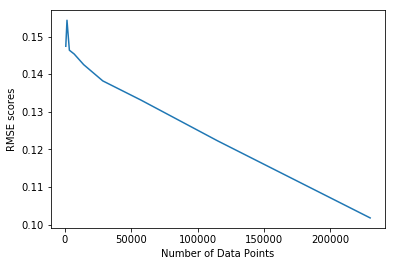

In [33]:
lens = [len1, len2, len3, len4, len5, len6, len7, len8, len9]
score = [sqrt(-score1.mean()), sqrt(-score2.mean()), sqrt(-score3.mean()), sqrt(-score4.mean()), sqrt(-score5.mean()), sqrt(-score6.mean()), sqrt(-score7.mean()), sqrt(-score8.mean()), sqrt(-score9.mean())]

plt.plot(lens, score)
plt.ylabel('RMSE scores')
plt.xlabel('Number of Data Points')
plt.show()

In [34]:
# Just to see scores
for x in score:
    print(x)

0.101802677608
0.12230868961
0.133104402415
0.138204706973
0.142517112443
0.145356482836
0.146357057184
0.154321117212
0.147407340036


# Linear Regression
- Same Process as Random Forest, but no parameters for Linear Regression.

In [85]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

cross_validation_linear_reg = cross_val_score(linear_reg, train_features, train_target, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation_linear_reg.mean()))

linear_reg.fit(train_features, train_target)

prediction_linear = linear_reg.predict(test_features)
print "List of predictions:", prediction_linear, "\n"

0.141805949719
List of predictions: [ 0.48655161  0.51201361  0.52346198 ...,  0.96668303  0.66057901
  0.33568512] 



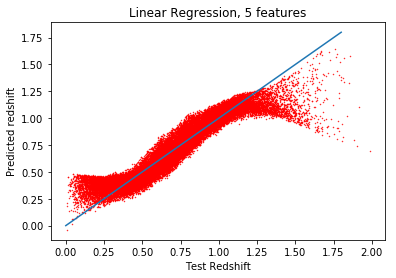

In [36]:
plt.scatter(test_data['redshift'].tolist()[:30000], prediction_linear.tolist()[:30000], s=0.2, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("Linear Regression, 5 features")
plt.show()

# Definitely expected to be worse, but not the worst

In [37]:
import numpy as np

prediction_difference_linear = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_linear.append(prediction_linear[x] - test_data['redshift'][x])
    x += 1

sigma_68_linear = np.percentile(np.abs(prediction_difference_linear), 68)
    
print(sigma_68_linear)

0.0910624812438


In [38]:
total = 0
for x in prediction_difference_linear:
    total += np.abs(x)
    
mean_linear = total/len(prediction_difference_linear)
print(mean_linear)

0.0810151348608


# Ridge Regression
- Oddly enough, Linear Regression seems to be very slightly better than Random Forest with only 5 features.
- Next, let's try Ridge Regression.

In [86]:
from sklearn.linear_model import Ridge

ridge = Ridge()

cross_validation_ridge = cross_val_score(ridge, train_features, train_target, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation_ridge.mean()))

ridge.fit(train_features, train_target)

prediction_ridge = ridge.predict(test_features)
print "List of predictions:", prediction_ridge, "\n"

0.141802978649
List of predictions: [ 0.48656405  0.51202258  0.52347634 ...,  0.96665998  0.66058082
  0.33569057] 



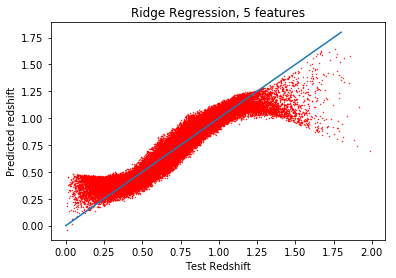

In [73]:
plt.scatter(test_data['redshift'].tolist()[:30000], prediction_ridge.tolist()[:30000], s=0.2, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("Ridge Regression, 5 features")
plt.show()

In [74]:
import numpy as np
prediction_difference_ridge = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_ridge.append(prediction_ridge[x] - test_data['redshift'][x])
    x += 1

sigma_68_ridge = np.percentile(np.abs(prediction_difference_ridge), 68)
    
print(sigma_68_ridge)

0.0910626830511


In [42]:
total = 0
for x in prediction_difference_ridge:
    total += np.abs(x)
    
mean_ridge = total/len(prediction_difference_ridge)
print(mean_ridge)

0.081016335946


# Linear Regression with Extra Features
- Ridge regression showed very little difference. It does slightly worse according to the sigma_68, but real small
- Attempt Linear with the added 4 features.

In [87]:
linear_reg_x = LinearRegression()

cross_validation_linear_reg_x = cross_val_score(linear_reg_x, train_features_x, train_target_x, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation_linear_reg_x.mean()))

linear_reg_x.fit(train_features_x, train_target_x)

prediction_linear_x = linear_reg_x.predict(test_features_x)
print "List of predictions:", prediction_linear_x, "\n"

0.141809135602
List of predictions: [ 0.48639292  0.51238627  0.52382273 ...,  0.966999    0.66112894
  0.33543009] 



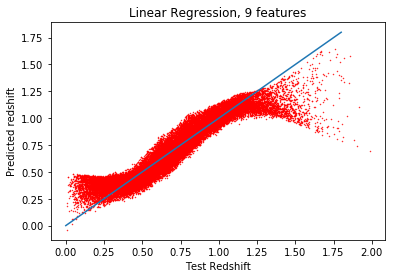

In [46]:
plt.scatter(test_data['redshift'].tolist()[:30000], prediction_linear_x.tolist()[:30000], s=0.2, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("Linear Regression, 9 features")
plt.show()

In [47]:
import numpy as np

prediction_difference_linear_x = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_linear_x.append(prediction_linear_x[x] - test_data['redshift'][x])
    x += 1

sigma_68_linear_x = np.percentile(np.abs(prediction_difference_linear_x), 68)
    
print(sigma_68_linear_x)

0.0911287494103


In [48]:
total = 0
for x in prediction_difference_linear_x:
    total += np.abs(x)
    
mean_linear_x = total/len(prediction_difference_linear_x)
print(mean_linear_x)

0.0810389724438


# Ridge Regression with extra features
- Linear Regression with extra features seems to have turned slightly worse. 0.090 sigma 68 to 0.091
- Attempt the same with ridge regression.

In [88]:
from sklearn.linear_model import Ridge
ridge_x = Ridge()

cross_validation_ridge_x = cross_val_score(ridge_x, train_features_x, train_target_x, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation_ridge_x.mean()))

ridge_x.fit(train_features_x, train_target_x)

prediction_ridge_x = ridge_x.predict(test_features_x)
print "List of predictions:", prediction_ridge_x, "\n"

0.141804976791
List of predictions: [ 0.48655586  0.51201634  0.52346729 ...,  0.96667565  0.66057966
  0.3356876 ] 



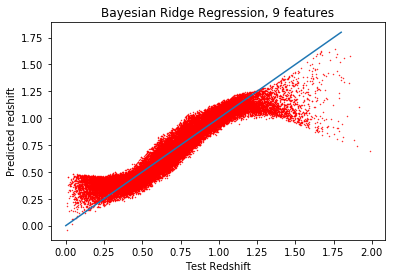

In [50]:
plt.scatter(test_data['redshift'].tolist()[:30000], prediction_ridge_x.tolist()[:30000], s=0.2, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("Ridge Regression, 9 features")
plt.show()

In [51]:
import numpy as np
prediction_difference_ridge_x = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_ridge_x.append(prediction_ridge_x[x] - test_data['redshift'][x])
    x += 1

sigma_68_ridge_x = np.percentile(np.abs(prediction_difference_ridge_x), 68)
    
print(sigma_68_ridge_x)

0.0910628604912


In [52]:
total = 0
for x in prediction_difference_ridge_x:
    total += np.abs(x)
    
mean_ridge_x = total/len(prediction_difference_ridge_x)
print(mean_ridge_x)

0.0810154248694


# End result
- Even ridge regression turned very slightly worse, but very minimal, much less than linear regression.
- These both give about the same result, though Random Forest is far, far more powerful with 9 features.
- Still, it seems that with only the filters, and no differences, you'd be better off with using linear or ridge regression.

In [53]:
# Try ONLY ridge regression, not bayesian
# Addres size of data etc.

In [44]:
# Prepare outline of research paper (bullet points)
# Intro, method, etc.
# Present as study of precision of photo redshift as function of data size
# Literature search (find out size of real data set for SDSS (specific sky survey), dark energy survey and LSST (find the site for each)
# SDSS already done, LSST starting soon, dark energy in progress (or starting soon)
# Can what I have help these surveys. Can you improve on these with your data.
# How many galaxies spectra, redshift research on the range for each survey + number of samples of galaxies
# Provides context for accuracy scaling with size
# Study and quantify how much you need to get good enough error
# Doubling helps? How much
# Size vs quality tradeoff
# Study change of error and sample size how it varies with signal of color (SN)
# Better to have small high quality dataset, or large low quality dataset?
# Might only be able to get good quality rarely due to moon setting (difficult to get good data instead of bad data)


# Signal 1

In [81]:
# creation of the new features from existing features (only a temporary data set)
test_data['y-g_SN_1'] = test_data['y_SN_1'] - test_data['g_SN_1']
test_data['g-r_SN_1'] = test_data['g_SN_1'] - test_data['r_SN_1']
test_data['r-i_SN_1'] = test_data['r_SN_1'] - test_data['i_SN_1']
test_data['i-z_SN_1'] = test_data['i_SN_1'] - test_data['z_SN_1']

In [76]:
rf_1 = RandomForestRegressor(max_depth=9, n_estimators = 30, random_state = 1)


train_features_1 = train_data[['y', 'g', 'r', 'i', 'z', 'y-g', 'g-r', 'r-i', 'i-z']]
train_target_1 = train_data['redshift']

cross_validation_1 = cross_val_score(rf_1, train_features_1, train_target_1, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation_1.mean()))

rf_1.fit(train_features_1, train_target_1)

# Improvement really small
#0.102503813601

0.102503813601


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [77]:
Features = ['y_SN_1', 'g_SN_1', 'r_SN_1', 'i_SN_1', 'z_SN_1', 'y-g_SN_1', 'g-r_SN_1', 'r-i_SN_1', 'i-z_SN_1']
test_features_1 = test_data[Features]
prediction_1 = rf_1.predict(test_features_1)
print "List of predictions:", prediction_1, "\n"

# List of predictions: [ 0.4564314   0.48251935  0.48872894 ...,  1.56350898  0.74109787
# 0.35132677] 

List of predictions: [ 0.43038347  0.49927801  0.44025589 ...,  1.11284604  0.73667989
  0.40474833] 



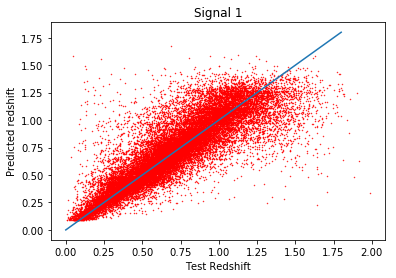

In [82]:
plt.scatter(test_data['redshift'].tolist()[:30000], prediction_1.tolist()[:30000], s=0.2, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("Signal 1")
plt.show()

In [79]:
import numpy as np

prediction_difference_1 = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_1.append(prediction_1[x] - test_data['redshift'][x])
    x += 1

sigma_68_1 = np.percentile(np.abs(prediction_difference_1), 68)
    
print(sigma_68_1) #0.0257650130941

0.109982746959


In [83]:
total = 0
for x in prediction_difference_1:
    total += np.abs(x)
    
mean_1 = total/len(prediction_difference_1)
print(mean_1) #0.0253558022156

0.105951385554


# Signal 2

In [89]:
# creation of the new features from existing features (only a temporary data set)
test_data['y-g_SN_2'] = test_data['y_SN_2'] - test_data['g_SN_2']
test_data['g-r_SN_2'] = test_data['g_SN_2'] - test_data['r_SN_2']
test_data['r-i_SN_2'] = test_data['r_SN_2'] - test_data['i_SN_2']
test_data['i-z_SN_2'] = test_data['i_SN_2'] - test_data['z_SN_2']

In [90]:
rf_2 = RandomForestRegressor(max_depth=9, n_estimators = 30, random_state = 1)


train_features_2 = train_data[['y', 'g', 'r', 'i', 'z', 'y-g', 'g-r', 'r-i', 'i-z']]
train_target_2 = train_data['redshift']

cross_validation_2 = cross_val_score(rf_2, train_features_2, train_target_2, scoring='neg_mean_squared_error')
print(sqrt(-cross_validation_2.mean()))

rf_2.fit(train_features_2, train_target_2)

# Improvement really small
#0.102503813601

0.102503813601


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [91]:
Features = ['y_SN_2', 'g_SN_2', 'r_SN_2', 'i_SN_2', 'z_SN_2', 'y-g_SN_2', 'g-r_SN_2', 'r-i_SN_2', 'i-z_SN_2']
test_features_2 = test_data[Features]
prediction_2 = rf_2.predict(test_features_1)
print "List of predictions:", prediction_1, "\n"

# List of predictions: [ 0.4564314   0.48251935  0.48872894 ...,  1.56350898  0.74109787
# 0.35132677] 

List of predictions: [ 0.43038347  0.49927801  0.44025589 ...,  1.11284604  0.73667989
  0.40474833] 



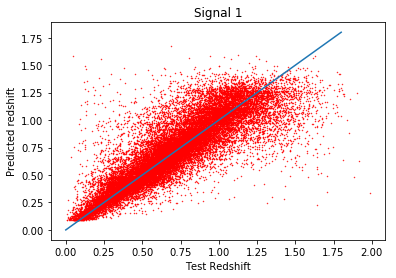

In [92]:
plt.scatter(test_data['redshift'].tolist()[:30000], prediction_2.tolist()[:30000], s=0.2, color="red")
plt.plot([0, 1.8], [0, 1.8])
plt.xlabel("Test Redshift")
plt.ylabel("Predicted redshift")
plt.title("Signal 1")
plt.show()

In [93]:
import numpy as np

prediction_difference_2 = []

x = 0
while x < len(test_data['redshift']):
    prediction_difference_2.append(prediction_2[x] - test_data['redshift'][x])
    x += 1

sigma_68_2 = np.percentile(np.abs(prediction_difference_2), 68)
    
print(sigma_68_2) #0.0257650130941

0.109982746959


In [94]:
total = 0
for x in prediction_difference_2:
    total += np.abs(x)
    
mean_2 = total/len(prediction_difference_2)
print(mean_2) #0.0253558022156

0.105951385554
